**1.1 Importing the dataset**

In [237]:
import pandas as pd
df=pd.read_excel("/content/Bank_Personal_Loan.xlsx","Data")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [238]:
# To display the top 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [239]:
# To display the bottom 5 rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**1.2 Importing the required libraries**

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

**1.3 Checking the types of data**

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**1.4 Statistical summary of data**

In [242]:
df.describe() # To display count,mean,std,min,max,etc.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [243]:
# Observation :We find that Experience column shows a negative value ,which is not possible. So, we need to make changes in Experience column.

**1.5 Shape of dataset**

In [244]:
df.shape

(5000, 14)

**1.6 Detection of null values.**

In [245]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [246]:
df.isnull().values.any()

False

In [247]:
#Observation : There is no empty value in the data set.

**2. Cleaning the irrelevant data**

**2.1 Dropping irrelevant columns**

In [248]:
# We see that id is not a useful feature in the dataset as it is generated just to identify a customer.So,it won't play a role to decide whether a customer will take a loan or not.

In [249]:
# So,we will drop the id column.

In [250]:
df=df.drop(['ID'],axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [251]:
# We know that more age means more experience.So,let's check the correlation between Age and Experience.

In [252]:
age=df['Age']
exp=df['Experience']
correlation=exp.corr(age)
correlation



0.9942148569683321

In [253]:
#Observation : So,we see that Age and Experience are highly correlated.So among these two,we drop Experience column as it had negative values.

In [254]:
df=df.drop(['Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**3.EDA:**

**3.1 Number of unique in each column**

In [255]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [256]:
#Observation :We see that ZIP Code has 467 unique values.It has no sequence,i.e. it is a nominal variable with too many levels.So, we'll drop ZIP Code.

In [257]:
df=df.drop('ZIP Code',axis=1)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**3.2 Number of people with zero mortgage**

In [258]:
(df.Mortgage==0).sum()

3462

In [259]:
# Observation :It shows that there are 3462 people out of 5000 with 0 Mortgage. This makes the data skewed.

**3.3 Number of people with zero credit card spending per month**

In [260]:
(df.CCAvg==0).sum()

106

In [261]:
# Observation :We see that there are 106 people with zero credit card spending per month.

**3.4 Value counts of all categorical columns**

In [262]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [263]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [264]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [265]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [266]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [267]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**3.5 Univariate and Multivariate analysis**

**3.5.1 Univariate Analysis**

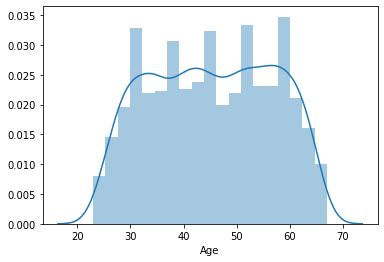

In [268]:
sns.distplot(df.Age)

In [269]:
# Observation :Age seems to have a symmetric distribution.

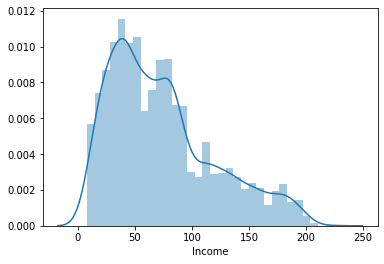

In [270]:
sns.distplot(df.Income)

In [271]:
# Observation :Income is right skewed distribution.

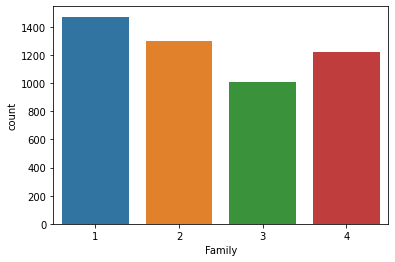

In [272]:
sns.countplot(df.Family)

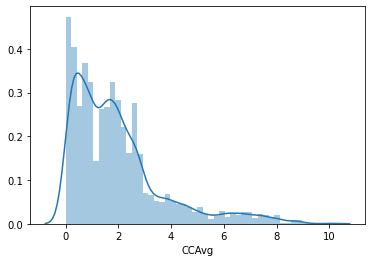

In [273]:
sns.distplot(df.CCAvg)

In [274]:
# Observation :Credit Card Average is right skewed distribution.

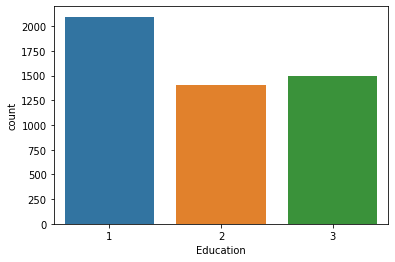

In [275]:
sns.countplot(df.Education)

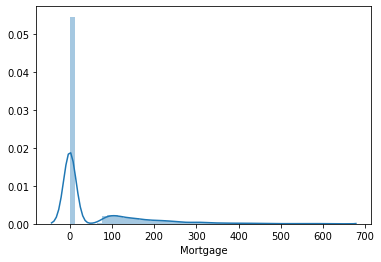

In [276]:
sns.distplot(df.Mortgage)

In [277]:
# Observation :Mortgage seems highly skewed.

**3.5.2 Multivariate Analysis**

In [278]:
# Relationship between Education,Income and Personal Loan:

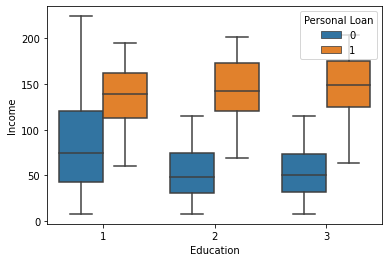

In [279]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

In [280]:
# Observation : It seems that the customers whose education level is 1 are having more income. However,customers who have taken the personal loan have almost the same income levels. 

In [281]:
# Relationship between Securities Account and Personal Loan:

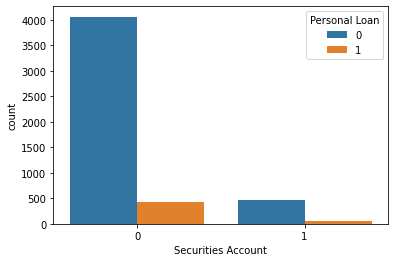

In [282]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

In [283]:
# Observation : Majority of customers having securities account don't have personal loan.

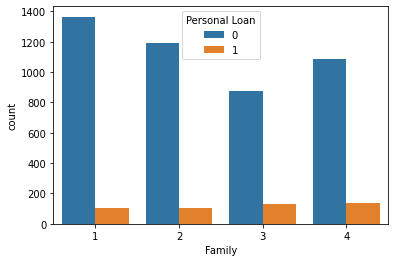

In [284]:
# Relationship between Family and Personal Loan:
sns.countplot(x='Family',data=df,hue='Personal Loan')

In [285]:
#Observation: Family size does not have any impact on personal loan.

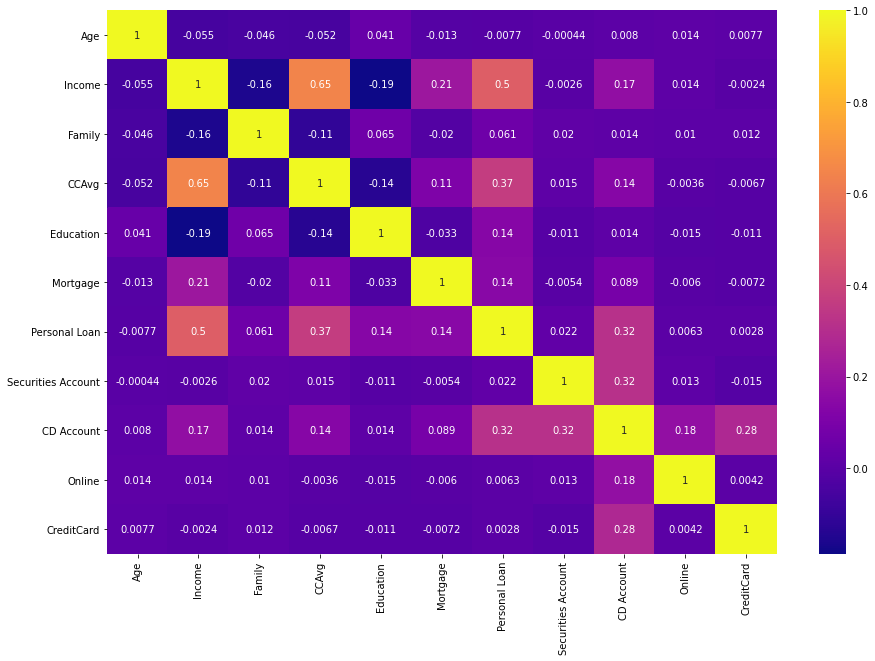

In [286]:
# Correlation Matrix
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

In [287]:
# Observation: Only Income and Credit Card Average have high correlation.

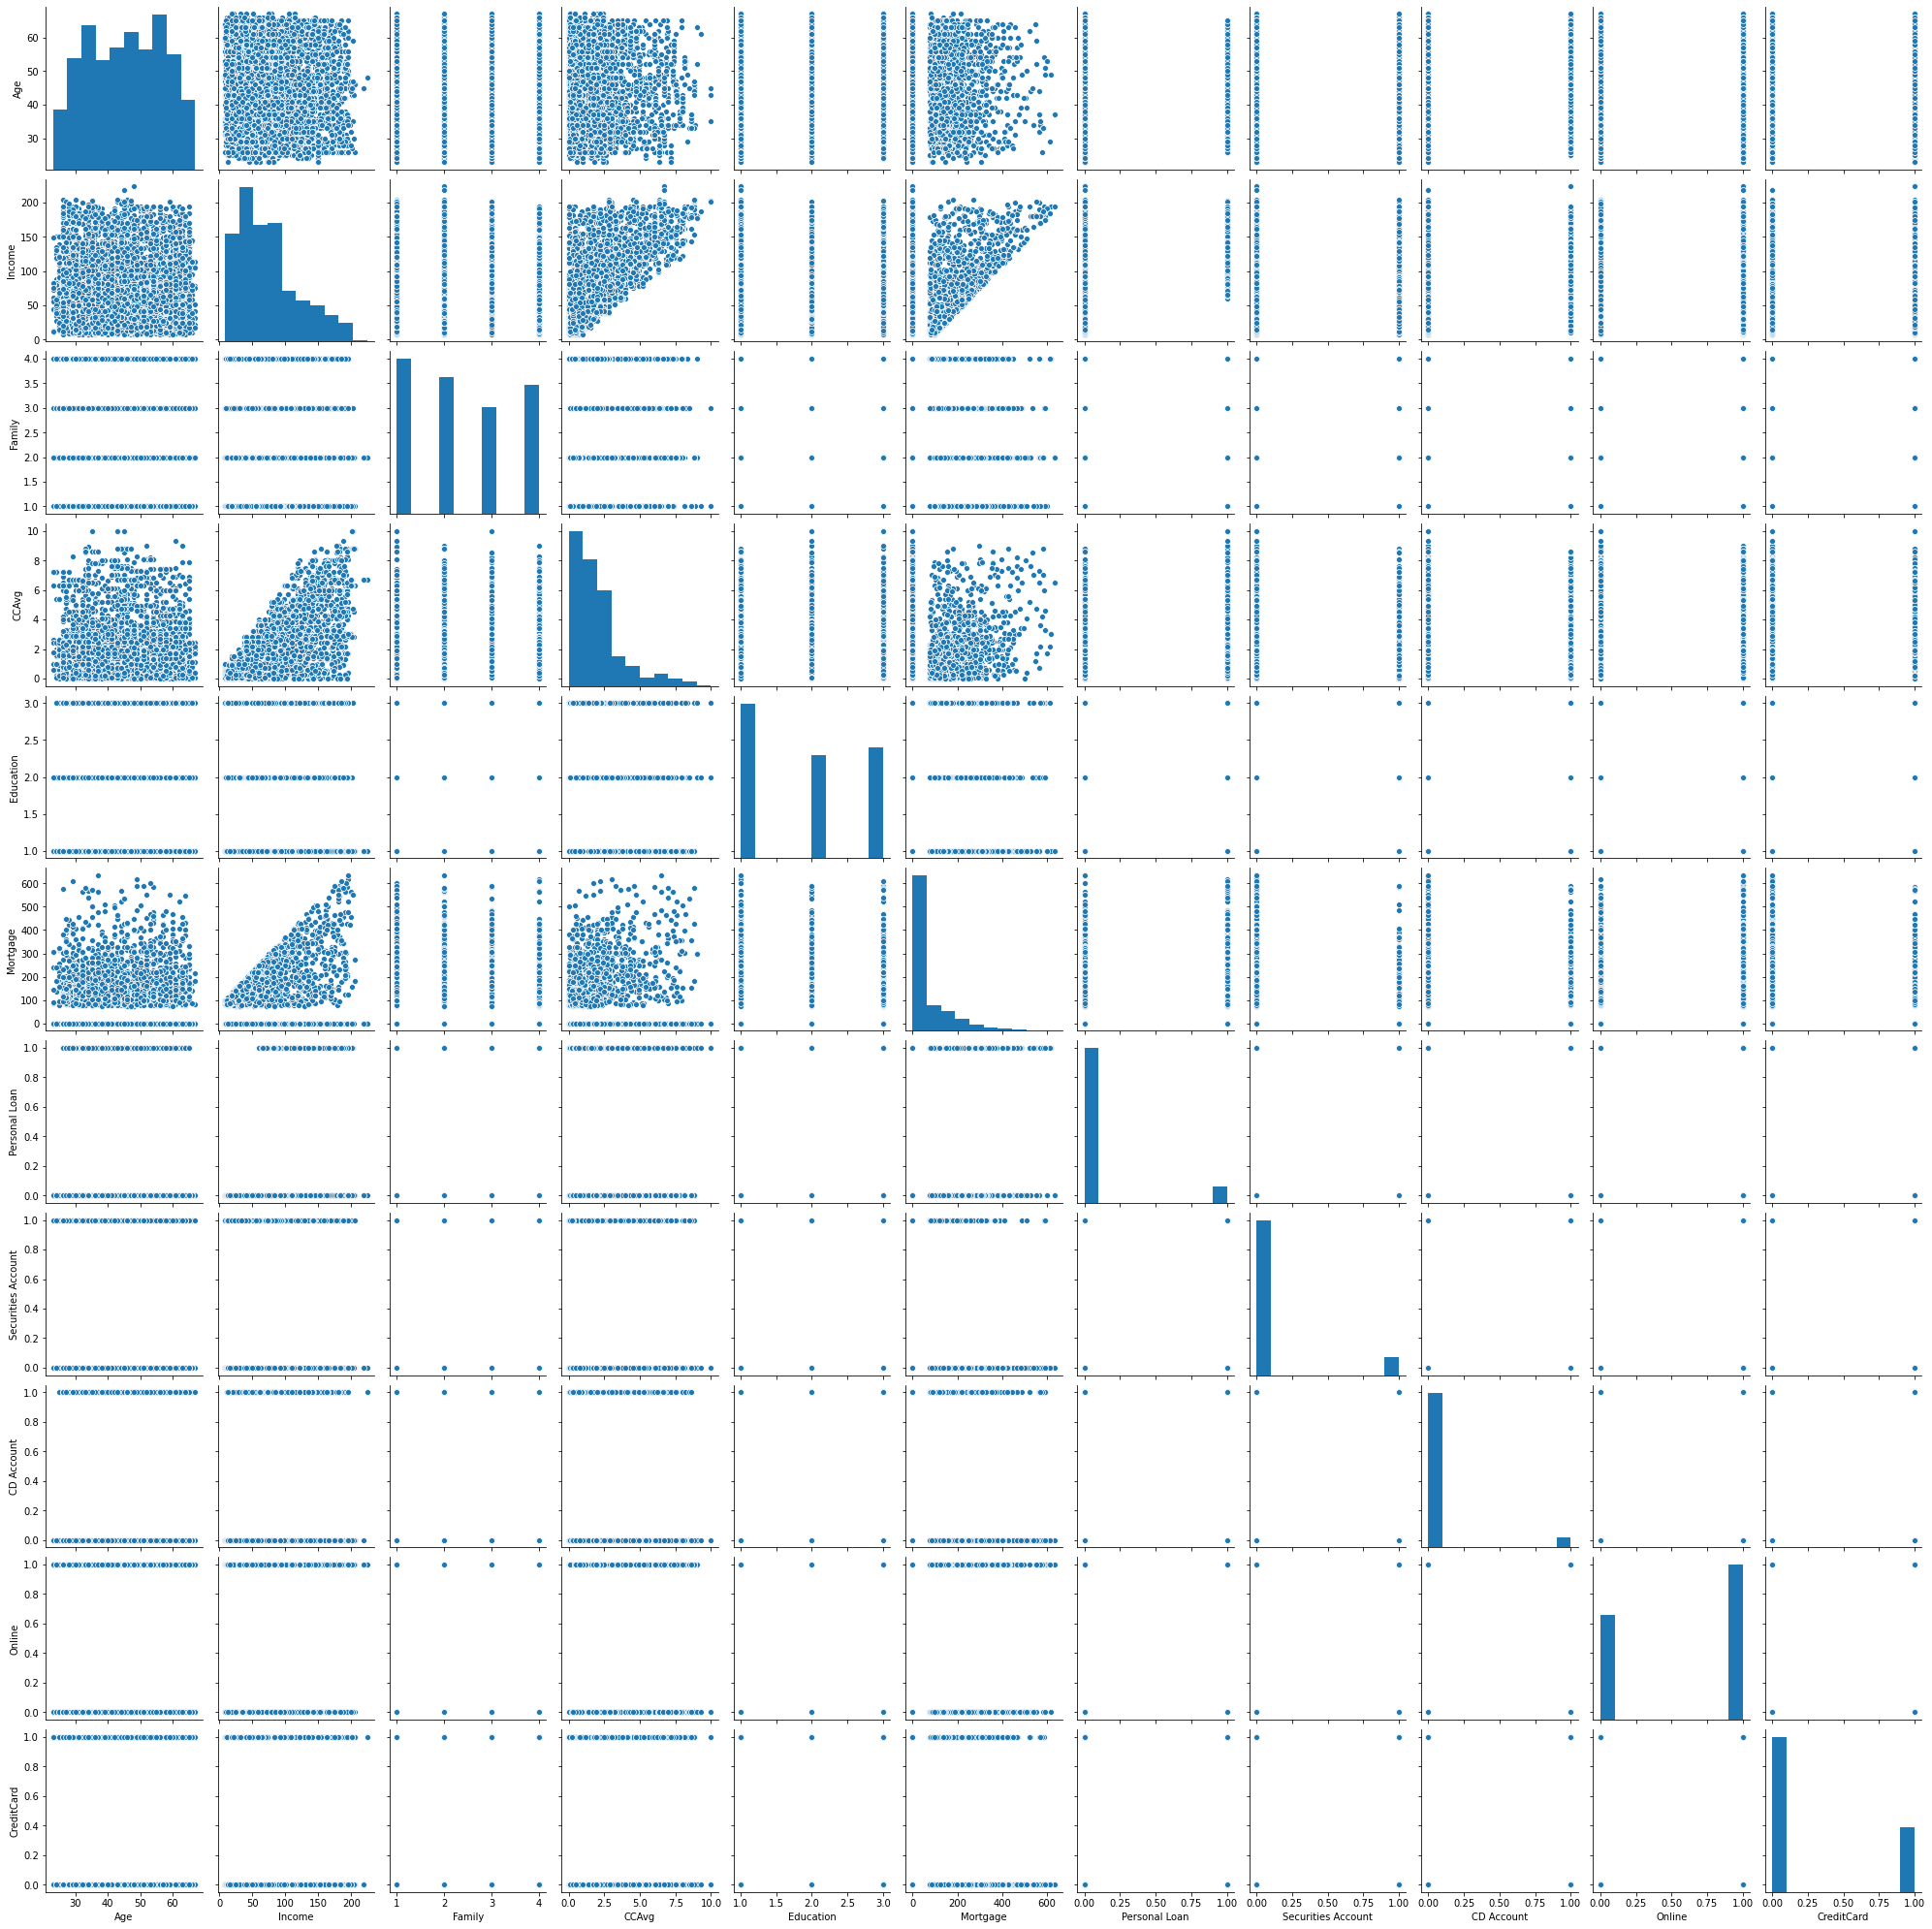

In [288]:
sns.pairplot(df)

In [289]:
#Plotting 1 variable with every other variable.
#Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.
#Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this as the mean is greater than the median.
#CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spend less than 2.5K.
#Mortgage: 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
#The variables family and education are ordinal variables. Family is evenly distributed.

**4. Transformations of the feature variables**

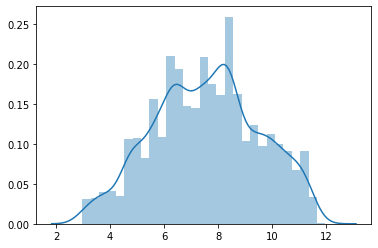

In [290]:
#Transforming Income variable:
data_X=df.loc[:,df.columns!="Personal Loan"]
data_Y=df[['Personal Loan']]

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
t=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(t)

In [291]:
#Observation: Income was right skewed.So,we transformed it using "yeo-johnson" method.And,we find that it is now normally distributed.

In [292]:
data_X.shape,data_Y.shape

((5000, 10), (5000, 1))

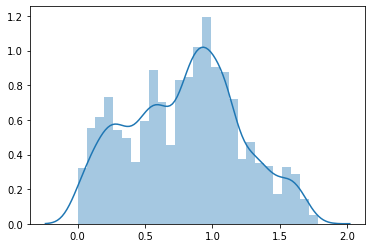

In [293]:
#Transforming CCAvg variable:

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
t=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(t)

In [294]:
#Observation: CCAvg was right skewed.So,we transformed it using "yeo-johnson" method.And,we find that it is now normally distributed.

In [295]:
#Mortgage variable was also right skewed.But, there is discontinuity in the data.So,we can't transform it like the previous variables.So,we will bin the Mortgage variable.

In [296]:
#Binning the Mortgage variable:
data_X['Mortgage_int'] = pd.cut(data_X.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
data_X.drop('Mortgage', axis=1, inplace=True)
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


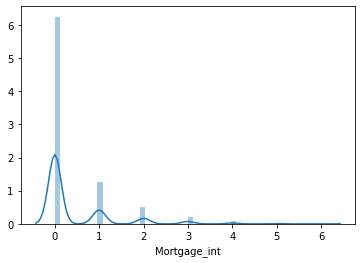

In [297]:

sns.distplot(data_X.Mortgage_int)

**5. Splitting the data**

In [298]:
# Using stratified sampling
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

**Scaling**

In [299]:
sc = MinMaxScaler()
train_x = sc.fit_transform(train_X)
test_x = sc.fit_transform(test_X)

**Logistic Regression**

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [301]:

log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_x, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [302]:

class_name = ['will not take loan', 'take loan']

Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.87
Recall: 0.59


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

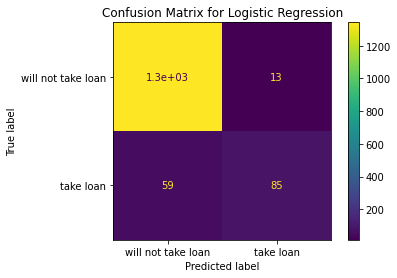

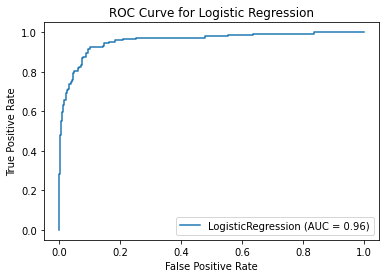

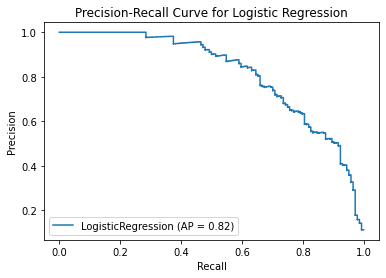

In [303]:
train_score = log_reg.score(train_x, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_x, test_Y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_x)

precision_logi = precision_score(test_Y, y_pred_logi, labels=class_name).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_Y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_x, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_x, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_x, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')

**Random forest classification**

In [311]:

#Random forest is an ensemble machine learning algorithm.

#It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems.

#It works in four steps:

#1)Select random samples from a given dataset.

#2)Construct a decision tree for each sample and get a prediction result from each decision tree.

#3)Perform a vote for each predicted result.

#4)Select the prediction result with the most votes as the final prediction.

In [304]:

rf = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rf.fit(train_x, train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.93
Recall: 0.9


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

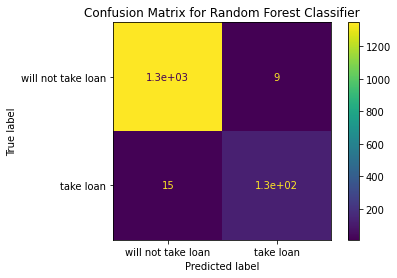

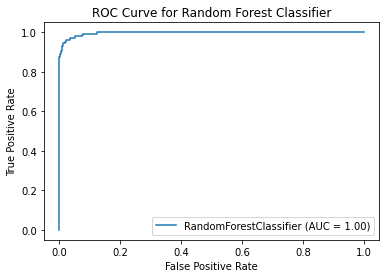

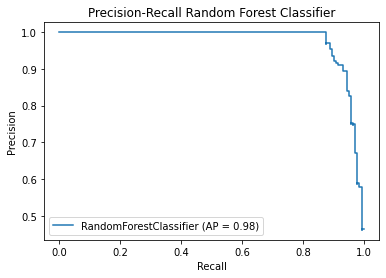

In [305]:
train_score = rf.score(train_x, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = rf.score(test_x, test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf.predict(test_x)

precision_rf = precision_score(test_Y, y_pred_rf, labels=class_name).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_Y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf, test_x, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf, test_x, test_Y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf, test_x, test_Y)
plt.title('Precision-Recall Random Forest Classifier')


**Decision tree classification**

In [306]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_Y)
y_pred=dtc.predict(test_x)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.88
Recall: 0.92


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

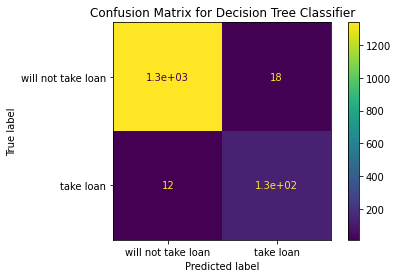

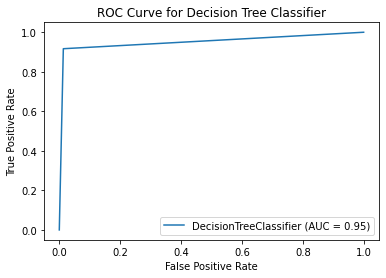

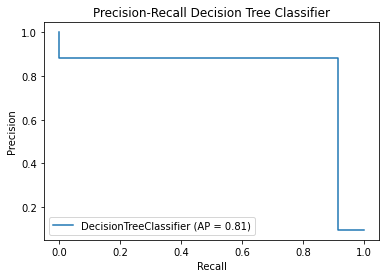

In [307]:
train_score = dtc.score(train_x, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_x, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_x, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_x, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_x, test_Y)
plt.title('Precision-Recall Decision Tree Classifier')


**K-nearest neighbors**

In [308]:

k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_x,train_Y)
y_pred=k.predict(test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.92
Recall: 0.51


Text(0.5, 1.0, 'Precision-Recall KNN Classifier')

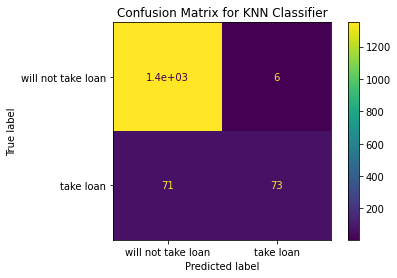

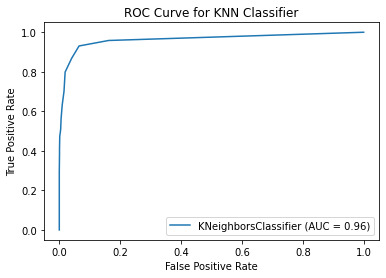

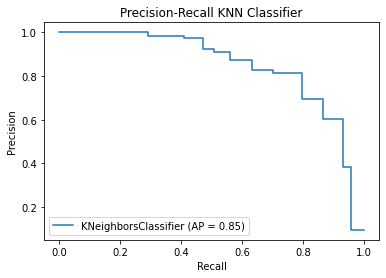

In [309]:
train_score = k.score(train_x, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_x, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k,test_x, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for KNN Classifier')

plot_roc_curve(k, test_x, test_Y)
plt.title('ROC Curve for KNN Classifier')

plot_precision_recall_curve(k, test_x, test_Y)
plt.title('Precision-Recall KNN Classifier')

In [309]:
#Conclusion:
#The aim of the bank is to convert there liability customers into loan customers.
#The bank's expectation from the dataset is to take out loans to its debtor customers and turn them into loan customers
#I imported the dataset named "df" and checked datatype, statistical summary, shape, null values, etc.
#I cleaned the dataset,performed EDA,transformations and then splitted data into training and test set in the ratio of 70:30 respectively
#Used the Logistic Regression model to predict the likelihood of a customer buying personal loans.
#Printed all the metrics related for evaluating the model performance
#Compare the performance of the predictive Model, various different classification algorithms were evaluated and used such as -
#1. K-nearest Neighbors
#2. Decision Tree Classification 
#3. Random forest classification
#And the classifications are compared based on the performance metrics; accuracy, precision, recall .
#And it was found that:
#1. K-nearest Neighbors had-
#Training Accuracy: 0.95
#Testing Accuracy: 0.95
'''Precision: 0.92
Recall: 0.51

2. Decision Tree Classification  
Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.89 
Recall: 0.92

3. Random forest Classification
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.93 
Recall: 0.9

Therefore, we can say that Random forest classification has the highest Precision value among the other classification algorithms.'''
